In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import brainiak.reconstruct.iem

In [11]:
# Generate synthetic data with dimension 9 that is linearly separable
n, dim = 300, 9
n_ = int(n/3)
np.random.seed(0)
C = -.25 + .5*np.random.rand(dim, dim) # covariance matrix
centers_0 = np.linspace(-1, 1, dim)
centers_60 = np.roll(centers_0,5)
centers_120 = centers_0[::-1]
X = np.vstack((np.dot(np.random.randn(n_, dim), C) + centers_0,
          np.dot(np.random.randn(n_, dim), C) + centers_60,
          np.dot(np.random.randn(n_, dim), C) + centers_120))

y = np.hstack((np.zeros(n_), 60*np.ones(n_), 120*np.ones(n_)))

print("Data, X, dimensions: " + str([np.size(X,0), np.size(X,1)]))

Data, X, dimensions: [300, 9]


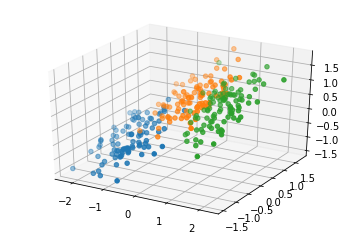

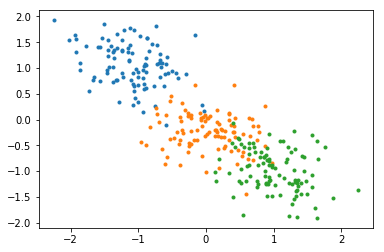

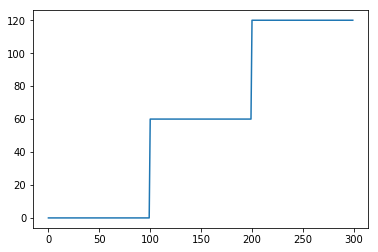

In [12]:
# Plot some perspectives of the synthetic data: 
# 3-D scatter plot and 2-D perspectives 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0:99,0], X[0:99,2], X[0:99,2])
ax.scatter(X[100:199,0], X[100:199,2], X[100:199,2])
ax.scatter(X[200:,0], X[200:,2], X[200:,2])

plt.figure()
plt.plot(X[0:99,0],X[0:99,8],'.',color='C0')
plt.plot(X[100:199,0],X[100:199,8],'.',color='C1')
plt.plot(X[200:299,0],X[200:299,8],'.',color='C2')

plt.figure()
plt.plot(y)

plt.show()

# Output should be a 3-D view of (3 of) the 
# dimensions of the data. Note that clusters
# separate (i.e. you could, roughly, draw a 
# line and separate them.
#
# A second plot shows just one projects of
# this, which makes separability more clear.
#
# The final plot just shows the feature labels.

In [19]:
# Create IEM object, feed it synthetic data, create new synthetic data
# and predict feature (direction) from that data.

s = brainiak.reconstruct.iem.InvertedEncoding(6, -30, 210)
s.fit(X,y)

X2_0 = np.dot(np.random.randn(n_, dim), C) + centers_0
X2_60 = np.dot(np.random.randn(n_, dim), C) + centers_60
X2_120 = np.dot(np.random.randn(n_, dim), C) + centers_120

y2_0 = np.zeros(n_)
y2_60 = 60*np.ones(n_)
y2_120 = 120*np.ones(n_)

r_hat_0 = s.predict(X2_0)
r_hat_60 = s.predict(X2_60)
r_hat_120 = s.predict(X2_120)

y_hat_0 = s._predict_directions(X2_0)
y_hat_60 = s._predict_directions(X2_60)
y_hat_120 = s._predict_directions(X2_120)

In [14]:
# Display decoded response directions from above computations.

print("Mean decoded direction: " + str([int(np.mean(r_hat_0)), int(np.mean(r_hat_60)), int(np.mean(r_hat_120))]))

# Decoded features should be close to 0, 60, and 120, since 
# those were the centers used to create the synthetic data.

Mean decoded direction: [1, 59, 114]


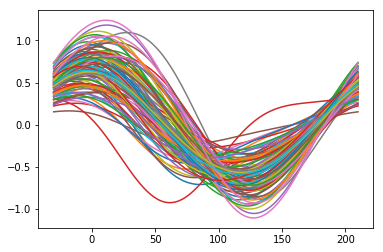

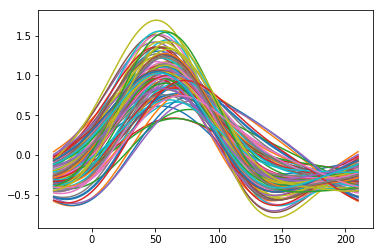

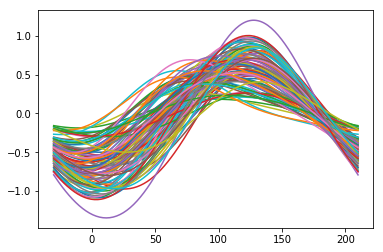

In [15]:
# Plot the channel responses

plt.figure()
plt.plot(s.C_D_, y_hat_0.transpose());
plt.figure()
plt.plot(s.C_D_, y_hat_60.transpose());
plt.figure()
plt.plot(s.C_D_, y_hat_120.transpose());

# Channel responses should have peaks at the feature
# value corresponding to their decoded value (i.e.
# 0, 60, and 120.

Decoded direction of mean response: [-1, 58, 120]


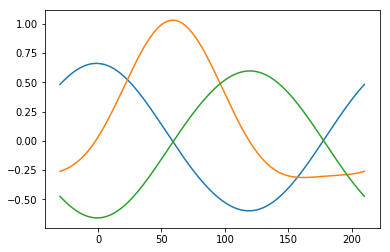

In [16]:
# Plot the average channel respone and show 
# decoded response predictions.

m0 = np.mean(y_hat_0,axis = 0)
m60 = np.mean(y_hat_60,axis = 0)
m120 = np.mean(y_hat_120,axis = 0)

plt.figure()
plt.plot(s.C_D_, m0,'-')
plt.plot(s.C_D_, m60,'-')
plt.plot(s.C_D_, m120,'-')

d0 = np.argmax(m0)
d60= np.argmax(m60)
d120 = np.argmax(m120)
print("Decoded direction of mean response: " + str([int(s.C_D_[d0]), int(s.C_D_[d60]), int(s.C_D_[d120])]))

# Output should simply be the mean of the channel
# outputs shown in the cell above. Peaks should be
# evident at 0, 60, and 120, the centers of the 
# synthetic data.

In [17]:
# Test getting parameters

param_out = s.get_params()
print(param_out)

# Output should be the parameters we initialized the 
# object with: 6, -30, 210

{'n_channels': 6, 'range_start': -30, 'range_stop': 210}


In [18]:
# Test setting parameters and predict again using new parameters

s.set_params(n_channels = 10, range_start = -90, range_stop = 270)

param_out_2 = s.get_params()
print(param_out_2)

s.fit(X,y)

X3_0 = np.dot(np.random.randn(n_, dim), C) + centers_0
X3_60 = np.dot(np.random.randn(n_, dim), C) + centers_60
X3_120 = np.dot(np.random.randn(n_, dim), C) + centers_120

y3_0 = np.zeros(n_)
y3_60 = 60*np.ones(n_)
y3_120 = 120*np.ones(n_)

r_hat3_0 = s.predict(X3_0)
r_hat3_60 = s.predict(X3_60)
r_hat3_120 = s.predict(X3_120)

print("Mean decoded direction: " + str([int(np.mean(r_hat3_0)), int(np.mean(r_hat3_60)), int(np.mean(r_hat3_120))]))

# Output should be the parameters that we set, and decoded feature values
# close to the ground truth, or 0, 60, 120.

{'n_channels': 10, 'range_start': -90, 'range_stop': 270}
Mean decoded direction: [-12, 59, 131]
